
# Project:  No-Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

A number of characteristics about the patient are included in each row:<br>

 
 
‘PatientId’ &nbsp; identify a unique number for each patient.<br> 
‘AppointmentID’ &nbsp; indicates the id of the scheduled appointment reserved by the client.<br>
‘Gender’ &nbsp; the gender of the patient.  <br>
‘ScheduledDay’ &nbsp; tells us on what day the patient set up their appointment.<br>
‘AppointmentDay’ &nbsp; the patient reservation appointment date . <br>
‘Age’ &nbsp; the patient age . <br>
‘Neighborhood’ &nbsp; indicates the location of the hospital.<br>
‘Scholarship’ &nbsp; indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>
‘Hipertension’ &nbsp; indicates whether or not the patient blood pressure is higher than normal.<br>
‘Alcoholism’ &nbsp; indicates whether or not the patient is continuing excessive or compulsive use of alcoholic drinks .<br>
‘Handcap’ &nbsp; indicates whether or not the patient having a physical or mental disability .<br>
‘SMS_received’ &nbsp; indicates whether or not the patient have received a sms  .<br>
‘No-show’ &nbsp; indicates whether or not the patient have shown in his appointment (where "No" indicate that the patient has attended in his appointment and "Yes" indicate that he miss his appointment)    .<br>
<br>



### Question for Analysis

In this analysis our goal is to answer one main big question: 
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
## Use this cell to set up import statements for all of the packages that you
##   plan to use.


# importing statements :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# use magic cell to import function from an other notebook saved as name "plot_function"
% run plot_function.ipynb


# use magic cell to run plots in place in notebook 
% matplotlib inline

# import our data 'noshowappointments-kagglev2-may-2016.csv' 
# from the folder 'Database_No_show_appointments'

df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')


<a id='wrangling'></a>
## Data Wrangling


### General Properties


Exploring our dataset and see our columns names and 4 rows as example of our data filled inside each columns

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.


# show the first 5 raws of the data set :

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In the next step we will find if there is any missing data and the type of  data in each column 

In [5]:
# data set info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>as we see above our data set is formed with the shape of 14 columns and 110527 raws , so there is no missing data any of the columns

> the 'PatientId' is shown as a float and it need to be as intger 

> 'ScheduledDay ' and 'AppointmentDay' are shown as object and to do a better investigation it need to be date data type (day , month , year)

<a id='describe'></a>
Our next step is to find a description of your data such as the min , the max , the standard diviation , the mean , the distribution of the data set (the 25% , 50% , 75% of the data )

In [6]:
# finding the min , max , std , mean , the 25% ,50 % ,75 % location in the data 

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



> by showing the description above we notice that there is a non logical data entrey in our data set in the"Age" column ,as in the min value it shows a negative value as '-1' , we will deal with it later in our cleaning steps .<br>






### Data Cleaning

In our next steps we will clean our data and make it comfortable for using in our investigation , so here is the titles of the our cleaning subjects we have handel it :
<ul>
<li><a href="#age">Dealing with the "Age" values</a></li>
<li><a href="#PatientId">change the type of  column "PatientId"</a></li>
<li><a href="#ScheduledDay"> Modify column "ScheduledDay</a></li>
<li><a href="#AppointmentDay">Modify column "AppointmentDay"</a></li>
<li><a href="#duplicate">check on the duplicate values in "AppointmentID "</a></li>
<li><a href="#drop">Drop 'AppointmentID' & 'PatientId' columns </a></li>
<li><a href="#rename"> Change the column name of "No-show" </a></li>
<li><a href="#showandmiss"> Creat two columns showing the show and miss appointments </a></li>   
   


</ul>







> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

<ul>

<a id='age'></a>


#### Dealing with the "Age"  values
as we see in our <a href="#describe">previous</a> description of data set, we found that the "Age" column have a negative value so in the next step we will find the patient data that own the miss leading age.

</ul>

In [7]:
# set a variable 'column_min' to store all the data of 'age' column
column_min = df["Age"]

# return the index of the min value in 'column_min'
min_index = column_min.idxmin()

# locate the index 'min_index' 
df.loc[[min_index]]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


by knowing that every patinet have a unique ID ,so trying to find if the patinet had made an other reservation for appoiment to find her right age if its found

In [8]:
# get the patinet ID for the negative age value:

patinet_id=df.loc[[min_index]].PatientId.values

# return the data with the same patinet ID :
negative_age_data= df[df['PatientId'].isin(patinet_id)]
negative_age_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


> the patient did not do another reservation 

so we will fix this negative age value and assum that age of the patient is the mean age of the female patient 

In [9]:
#find the mean age of the females patients :

mean_female_age= df.groupby(['Gender'])['Age'].mean().F

# return the mean female age :

int(mean_female_age)

38

In [10]:
# replace the "-1" in age column with the mean female age :

df.Age.replace(to_replace =-1,
                 value =mean_female_age,
               inplace=True)

In [11]:
# check if the negative value in age is successfully replaced

df.Age.min()

0.0

> as we check if the negative value is replaced with a mean female age value we found that there is an other miss leading age data as we found "0" age , maybe it refers to a baby just born or didnt complet "1" year yet .

so in our next cleaning step we will find the data of the patient with the "0" Age with the same steps we followed in the previouse negative age patinet value and try to find if the patient have done more than one appointment.

In [12]:
# set a variable 'column_min' to store all the data of 'age' column
column_min = df["Age"]

# return the index of the min value in 'column_min'
min_index = column_min.idxmin()

# locate the index 'min_index' 
df.loc[[min_index]]

# get the patinet ID for the zero age value:

patinet_id=df.loc[[min_index]].PatientId.values

# return the data with the same patinet ID :
negative_age_data= df[df['PatientId'].isin(patinet_id)]
negative_age_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0.0,CONQUISTA,0,0,0,0,0,0,No


> so the patient did not do another reservation 

so we will assum that the baby is just born yet so for will replace the zero age value with the 1 year old  :

In [13]:
# replace the "0" in age column with the mean female age :

df.Age.replace(to_replace =0,
                 value =1,
               inplace=True)

In [14]:
# check if the negative value in age is successfully replaced

df.Age.min()

1.0

as a last step in "Age" column is to make sure that all the data is in intger type 

In [15]:
# make column of "Age" integer type:
df.Age = df.Age.astype(int)

# check that the return type is integer:
df.Age.dtypes

dtype('int64')

<a id='PatientId'></a>
#### change the type of  column "PatientId" :
in this step we will change the type of column "PatientId" from float to integer 

In [16]:
#check the current type in column "PatientId":
df.PatientId.dtypes

dtype('float64')

In [17]:
# make column  "PatientId" into integer type:
df.PatientId = df.PatientId.astype(int)

# check that the return type is integer:
df.PatientId.dtypes

dtype('int64')

<a id='ScheduledDay'></a>

#### Modify column "ScheduledDay" :
As we saw that the 'ScheduledDay' column store the information of the time and the date witch the patient make the reservate, In our investigation we will use only the date , so our first step is to eliminate the timestamp, and the second step will be changing the type of the column 'ScheduledDay' into datetime type

<br>
First step is to keep only the date data in 'ScheduledDay'

In [18]:
# convert datetime column to just date

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date

#check the output 

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#check the ScheduledDay type:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


> the ScheduledDay column is now a date only but its in object type or as string

next we will convert the ScheduledDay into datetime type

In [20]:
#convert datetime string to datetime :

df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

#check if the ScheduledDay dtype is datetime :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 11.8+ MB


<a id='AppointmentDay'></a>

#### Modify column "AppointmentDay" :
As we did in the 'ScheduledDay' coloumn by keeping only the date data and changing the dtype of the column from string into datetime type , we will repeat the same steps here to make the column "AppointmentDay' useful in our investigation .

In [21]:
# convert datetime column to just date

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date

#check the output 

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


next we will convert the ScheduledDay into datetime type

In [22]:
#convert datetime string to datetime :

df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])

#check if the ScheduledDay dtype is datetime :

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


<a id='duplicate'></a>

#### Check on the duplicate values in "AppointmentID "

the AppointmentID is a unique ID which it must have no duplicates values in this column, Our aprouch here is to identify if there is any duplicate same patient information in all raws.

In [23]:
#check duplicate in column 'AppointmentID':

df[df.duplicated('AppointmentID')]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


> There is no duplicates values in AppointmentID

<a id='drop'></a>

#### Drop 'AppointmentID' & 'PatientId' columns :

Now we dont need the  'AppointmentID' & 'PatientId' columns in our investigation so the next is to drop it from our DataFrame:

In [24]:
# drop the AppointmentID and PatientId columns :

df.drop(['AppointmentID', 'PatientId'], axis = 1, inplace = True)

# return the first 5 raws :

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='rename'></a>

#### Change the column name of "No-show"  :

Rename  of "No-show" column into "No_show" to easly indicate in investigation

In [25]:
#rename the column of "No-show":

df.rename(columns = {'No-show':'No_show'}, inplace = True)

#check the return 

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='showandmiss'></a>

#### Creat two columns showing the "show" and "miss" appointments  :

We will creat two columns with names 'show' & 'miss' to represent a value "1" and "0" showing if the value is True or False

first step creating a copy from the 'No_show' column assigned with new name as "show":

In [26]:
# assing a variable as "new_column" contain a copy of the "No_show" column:
new_column=df['No_show']

# creat a new column named "show" contain the same data from "No_show" 
df['show'] = new_column

# check 5 raws of the data frame
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


creating a column named 'miss' as a copy of the "No_show" column data :

In [27]:
# assing a variable as "new_column" contain a copy of the "No_show" column:
new_column=df['No_show']

# creat a new column named "miss" contain the same data from "No_show" 
df['miss'] = new_column

# check 5 raws of the data frame
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,show,miss
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,No,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No,No


__For more understanding the values stored in the column "No Show"__,the column represnt as an answer for the quesion "did the patinet miss their appointments?" if patient show in his appoimnet so we will see a value "No" stored and if the patient miss his appoimnet, it will be shown as a value "Yes" .

for now in the next step we will replace the values stored in the "show" column, this column represent the patients __whose attend__ their appointments . The "No" value will be replaced with "1" (means he show in the appointment)  and the "Yes" value will be replaced with "0" (means he miss his appointment) .

In [28]:
# replace values in column "show" , value "no" with 1 (int) 
df.show.replace(to_replace ="No",
                 value =1, inplace=True)

# replace values in column "show" , value "yes" with 0 (int)
df.show.replace(to_replace ="Yes",
                 value =0, inplace=True)

# check 5 raws of the data frame
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,show,miss
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,No


as the previous step, we will replace the values stored in the "miss" column, this column represent the patients __whose miss__ their appointments . The "Yes" value will be replaced with "1" (means he miss the appointment)  and the "No" value will be replaced with "0" (means he attend his appointment) .

In [29]:
# replace values in column "miss" , value "Yes" with 1 (int) 
df.miss.replace(to_replace ="Yes",
                 value =1, inplace=True)

# replace values in column "miss" , value "No" with 0 (int) 
df.miss.replace(to_replace ="No",
                 value =0, inplace=True)

# check 5 raws of the data frame
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,show,miss
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0


In [30]:
# check if the sum of column 'show' plus the sum of column 'miss' equal the shape of the data farme with mean in this case '110527'
df.show.sum()+df.miss.sum()

110527

 __now we are all set and the cleaning of our data set has finished and we are raedy to exploratory fase for our data.__

In [31]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [32]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


<a id='eda'></a>
## Exploratory Data Analysis



### Which age have the highest probability to shows in their appointments ?

we will study if the age of the patient have a effect for our preduction to know if the patinet will attend his appointment.

first we will see the distrbution of total patients number over their age by showing the describtion for the age data

In [33]:
# make a descrition for the 'age' column 

df.Age.describe()

count    110527.000000
mean         37.121246
std          23.059148
min           1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

> the mean age for the patients is 37 year old , that is the 50% of the patients age in our data set

Showing the distribution for our age data can let us have a better figure for understanding the majority of the patient are in located in which area of age data

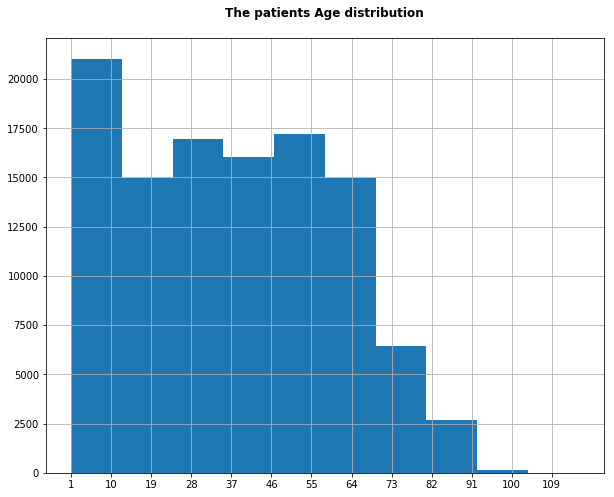

In [34]:
#ploting the histogram showing the range of the "age" column 

df.Age.hist(figsize=(10,8));

# set range for the x-axis
plt.xticks(np.arange(start=1, stop=111, step=9)) 

#set title for the histogram
plt.title('The patients Age distribution\n',
                fontsize = 12, fontweight ='bold');

> we can notice that the maximum number of patients are located between 1 years to 10 years old

Now lets see our mean age for the patients who have attended the appointments that they have scheduled , and the mean for the patients who have missed their appointments

In [35]:
# selecting the "age" of the patients who have attended the appointments from "show" column 
# and get the mean for their age 
# and type it as intger 

int(df.Age[df.show].mean())

57

> the mean age of the patients who shows in thier appointments = "57" years old

In [36]:
# selecting the "age" of the patients who have missed thier appointments from "miss" column 
# and get the mean for their age 
# and type it as intger 

int(df.Age[df.miss].mean())

60

> the mean age of the patients who miss in thier appointments = "60" years old

The next step is to see the distrubuation of the patients age for who have attened the appointments over the ones who have missed thier appointments.This step will clearfy if there is a pattern which we can use it to predict if the patient will show for his appointments or not .

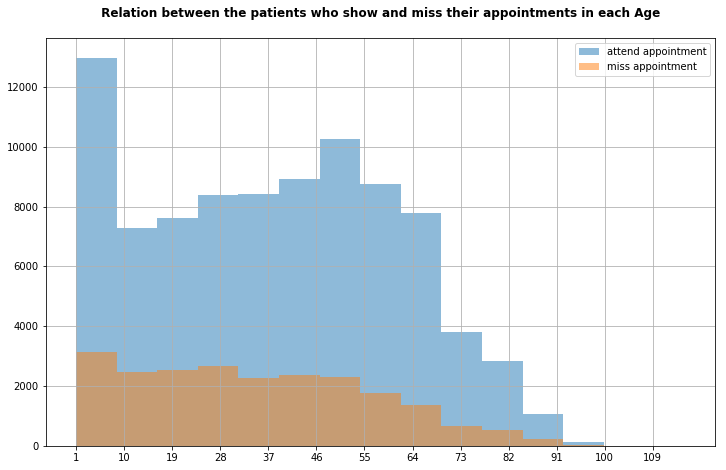

In [37]:
# creating a dataframe "show" to store a column with ONLY True from "show" column (1==True , 0==False)

shows = df.show == True


# creating a dataframe "miss" to store a column with ONLY True from "miss"  column (1==True , 0==False)

miss = df.miss == True


#plot histogram 

f, ax = plt.subplots(1, figsize = (12,7.5))

# assign label and alpha and bins and title
df.Age[shows].hist(alpha=0.5, bins=15, label='attend appointment')
df.Age[miss].hist(alpha=0.5, bins=15, label='miss appointment')

# setting title for the histogram
plt.title(' Relation between the patients who show and miss their appointments in each Age \n',
                fontsize = 12, fontweight ='bold');

# set range for the x-axis
plt.xticks(np.arange(start=1, stop=111, step=9)) 

# plot legend
plt.legend();

> this histogram shows the relation between the number of the patients who shows over the patients who missed thier appointments

> from this histogram we can notice that even when the miss number in the early ages (min that 10 years old) is the highest miss appointments although it is the highest number of patients who have attended their appointments.

> an other notice that also the ages between 45 to 55 have the highest propabilty to the patients to show in their appointments more than missing it 

__From this last investigation we can now predict that the patinest with the early age (min than 20 years old) and ages from 45 to 55 years old have the hight propabilty to attened their appoimnets than the other ages__

<br>






### Which Gender have the highest probability to shows in their appointments ?
<br>


To answer the question we need to set our data , so the next steps is to froup our data with the count of each genders which shows in thier appointments and also the count of each gender which miss thier appointments

In [38]:
#count the number of patients who shows and miss their appointments in each gender


#groupby 'Gender' column by the 'show' column and count the number of shown patients and miss patients 
gender_No_show= df.groupby('Gender')['show'].value_counts()



#check the result 
gender_No_show

Gender  show
F       1       57246
        0       14594
M       1       30962
        0        7725
Name: show, dtype: int64

>  the value "1" under the column "show" represent the state of the patient who shows in his appointments and the "0" value represent the patient who miss their appointments.

> the data above represent the total number of show and miss appointments in each gender

now lets seperate the men from the females patients to evaluate each gender by the state of "No" which reprsesent the patient who attend thier appointments or "Yes" which reprsesent the patient who miss their appointments

In [39]:
# filter men who have attended the appointments represented by value "No"
# and those who miss the appoimnet represented by value"yes"

Men_No_show=df.query('Gender=="M"')['No_show'].value_counts()



#check the dataframe
Men_No_show

No     30962
Yes     7725
Name: No_show, dtype: int64

In [40]:
# filter females who have attended the appointments represented by value "No"
# and those who miss the appoimnet represented by value"yes"

Female_No_show=df.query('Gender=="F"')['No_show'].value_counts()



#check the dataframe
Female_No_show

No     57246
Yes    14594
Name: No_show, dtype: int64

<br>


Now let us plot a pie chart to figure out the is the ratio and the percentage of the men who __shows__ over who __miss__ their  appointments.

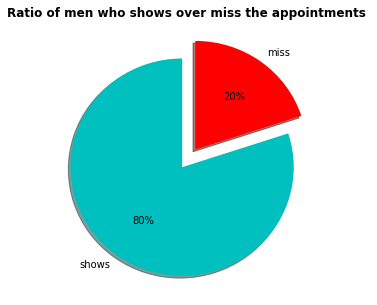

In [41]:
#assigning colours for the plot 
cols = ['c', 'r']    # 'cyan ' and 'red' color

#figure size
fig = plt.figure(figsize =(5, 5)) 

# plot the title of the pie chart
plt.title('Ratio of men who shows over miss the appointments ',
                fontsize = 12, fontweight ='bold')


#plot the pie chart with the 'show' and 'miss' data from 'Men_No_show' DataFrame
plt.pie(Men_No_show, labels = ['shows','miss'], colors = cols, startangle = 90, shadow = True, explode = (0.1, 0.1),autopct='%.0f%%');


> we can notice that 80% of the men patients has attended thier appointments over 20% of them have missed it 

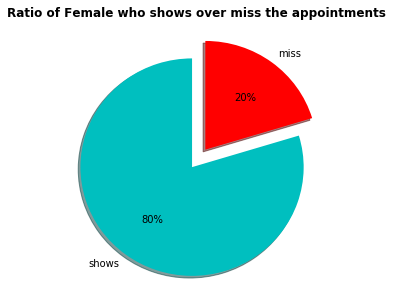

In [42]:
#assigning colours for the plot 
cols = ['c', 'r']  # 'cyan ' and 'red' color

#figure size
fig = plt.figure(figsize =(5, 5))

# plot the title of the pie chart
plt.title('Ratio of Female who shows over miss the appointments ',
                fontsize = 12, fontweight ='bold')

# plot the pie chart with the 'show' and 'miss' data from 'Female_No_show' DataFrame
plt.pie(Female_No_show, labels = ['shows','miss'], colors = cols, startangle = 90, shadow = True, explode = (0.1, 0.1),autopct='%.0f%%');


> 80 % of the females have attened thier appointments over 20% of them have missed thier appointments

__We noticed here after these investigation that the gender does not effect the prediction for which gender will have the highest possibility to attend because the ratio between men and females are so close__




<br>

<br>






### Which Neighbourhood have the highest probability to shows in their appointments ?
<br>


This investigation take a look if there is a certain areas that have the high show up from the patients and the ones who have the highest missing appointments

<a id='show'></a>
The next step is to creat a new DataFrame wich contain each Neighbourhood that have listed in our dataset and the total number of __shown__ patients in each Neighbourhood

In [43]:
# assign a new DataFrame which consist of the "Neighbourhood" column
# and the sum number of the patients who attend thier appointments 
df_Neighbourhood_shows=df.groupby(['Neighbourhood'])['show'].sum()

#creat a DataFrame
df_Neighbourhood_shows=pd.DataFrame(df_Neighbourhood_shows)

# sort the by the hightes value of the show column 
df_Neighbourhood_shows=df_Neighbourhood_shows.sort_values("show", ascending=False)

#check the ouput 
df_Neighbourhood_shows.head()

,show
Neighbourhood,
JARDIM CAMBURI,6252
MARIA ORTIZ,4586
RESISTÊNCIA,3525
JARDIM DA PENHA,3246
SANTA MARTHA,2635


> DataFrame for the  names of the patients Neighbourhood who have assign by them and the total number of patients who have __attended__ thier appointments 


for next, ploting our dataFame with a bar chart, representing the Y-axis as the Neighbourhood list and the X-axis for the total count of the patients who have __attended the appointments__,and we are using a function we have called from out of this sheet to min the codes in our presentation

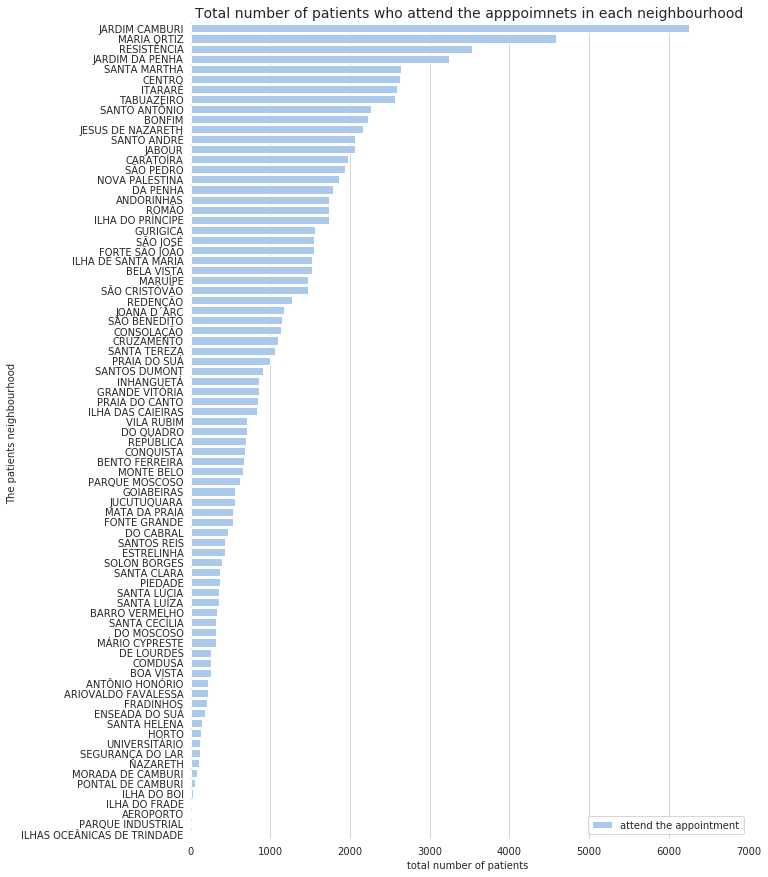

In [44]:
#call a function from "plot_function" to plot an horiztonal bar chrat

#docstring :
''''plot_horizontal_barchart (dataframe, column, label, ylabel, xlabel, title, xlim=7000)

    plot  horizontal bar chart.


    Parameters
    ----------
    dataframe : pandas dataframe

    column : str
        the investigated column,represent the data in x axis 
        
    label : str
        set a label name for the bar 
        
    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    
    xlim: int
        set limitation for x axis values, it is set as default as 7000    

    Returns
    -------
    
    bar chart plot
    
'''

# call the function:

plot_horizontal_barchart (df_Neighbourhood_shows,'show' ,"attend the appointment",
                          "The patients neighbourhood ", "total number of patients ",
                          "Total number of patients who attend the apppoimnets in each neighbourhood")

> from this graph we can have a great notice that the highest patients __attend thier appointments__ is "JARDIM CAMBURI" &
" MARIA ORTIZ "

<a id='miss'></a>
For next one, creating a dataframe for representing the highest Neighbourhood with __missing appointments__

In [45]:
# assign a new DataFrame which consist of the "Neighbourhood" column
# and the sum number of the patients who miss thier appointments 
df_Neighbourhood_miss=df.groupby(['Neighbourhood'])['miss'].sum()

#creat a DataFrame for the "df_Neighbourhood_miss"
df_Neighbourhood_miss=pd.DataFrame(df_Neighbourhood_miss)

# sort the by the hightes value of the show column 
df_Neighbourhood_miss=df_Neighbourhood_miss.sort_values("miss", ascending=False)

#check the ouput  
df_Neighbourhood_miss

,miss
Neighbourhood,
JARDIM CAMBURI,1465
MARIA ORTIZ,1219
ITARARÉ,923
RESISTÊNCIA,906
CENTRO,703
...,...
ILHA DO BOI,3
ILHA DO FRADE,2
ILHAS OCEÂNICAS DE TRINDADE,2


> DataFrame for the  Neighbourhoods of the patients  who have assign by them and the total number of patients who have __missed__ thier appointments 

plotting the DataFrame to represent the hightest neighbourhood in which the patients has recorded for a highest missing appointments, using a function for ploting horizontal bar chart

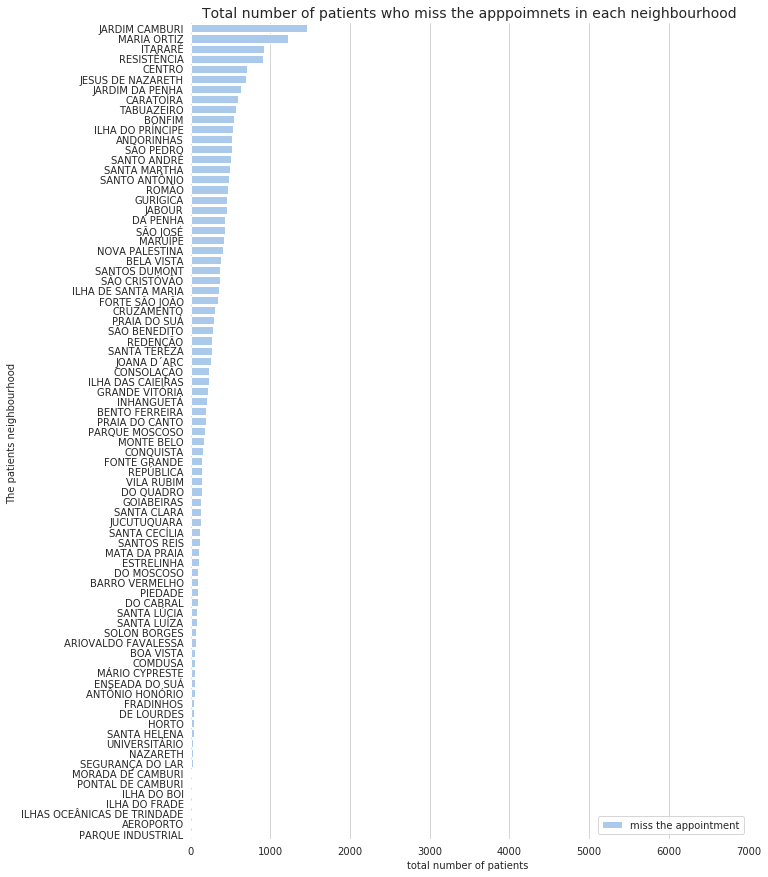

In [46]:
#call a function from "plot_function" to plot an horiztonal bar chrat 

#docstring :
''''plot_horizontal_barchart (dataframe, column, label, ylabel, xlabel, title, xlim=7000)

    plot  horizontal bar chart.


    Parameters
    ----------
    dataframe : pandas dataframe

    column : str
        the investigated column,represent the data in x axis 
        
    label : str
        set a label name for the bar 
        
    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    
    xlim: int
        set limitation for x axis values, it is set as default as 7000    

    Returns
    -------
    
    bar chart plot
    
'''

# call the function:

plot_horizontal_barchart (df_Neighbourhood_miss,'miss' ,"miss the appointment",
                          "The patients neighbourhood ", "total number of patients ",
                          "Total number of patients who miss the apppoimnets in each neighbourhood")

> "JARDIM CAMBURI" & " MARIA ORTIZ " Neighbourhoods have recorded as the highest __missing appointments__  

Next we will have a better understanding by submiting __the shows and the missing appointments__ in one graph to figure out the relation of each Neighbourhood related to the shows and missing total patients numbers

To do that we have to concat our dataframe and setting a new dataframe with "show" and "missing" columns with the same index (Neighbourhood)

In [47]:
# creating a new dataframe and concat the data frames with represent the show and miss appointments columns 
df_Neighbourhood_concat=pd.concat([df_Neighbourhood_shows, df_Neighbourhood_miss], axis=1 ,sort=True)

#check the dataframe
df_Neighbourhood_concat

,show,miss
AEROPORTO,7,1
ANDORINHAS,1741,521
ANTÔNIO HONÓRIO,221,50
ARIOVALDO FAVALESSA,220,62
BARRO VERMELHO,332,91
...,...,...
SÃO JOSÉ,1549,428
SÃO PEDRO,1933,515
TABUAZEIRO,2559,573
UNIVERSITÁRIO,120,32


> now we have set a new data frame which have a new columns "show" to present the total number of patients who have attende the appointments in each Neighbourhood

> and the "miss" column present the total number of the patients who have missed their appointments in each Neighbourhood

Now lets sort our new data frame (df Neighbourhood sort) by descending order to show which Neighbourhood own the highest number of patients whose show to their appointments

In [48]:
# sort the DataFrame by the highest total number in show column to the lowest total number 
df_Neighbourhood_sort=df_Neighbourhood_concat.sort_values("show", ascending=False)

# check the result 
df_Neighbourhood_sort

,show,miss
JARDIM CAMBURI,6252,1465
MARIA ORTIZ,4586,1219
RESISTÊNCIA,3525,906
JARDIM DA PENHA,3246,631
SANTA MARTHA,2635,496
...,...,...
ILHA DO BOI,32,3
ILHA DO FRADE,8,2
AEROPORTO,7,1
PARQUE INDUSTRIAL,1,0


> now we have checked that the new combined data frame have the same Neighbourhood name and same numbers in total patients in <a href="#show">shown</a>  and <a href="#miss">miss</a> columns 

Now lets plot our bar chart to have a better view for our relation between the show and miss appoimnets in each Neighbourhood 

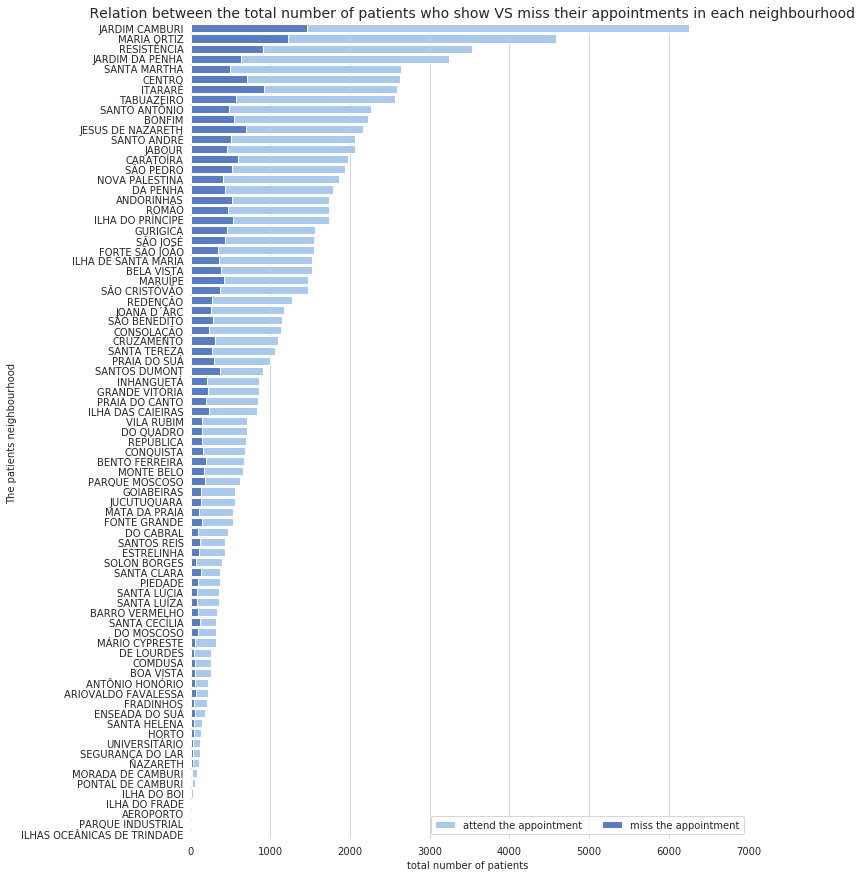

In [49]:
# set the backgroun colour and grid:
sns.set_style("whitegrid")


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))



# Plot the patients that attend the appointment
sns.set_color_codes("pastel")
sns.barplot(x='show', y= df_Neighbourhood_sort.index, data=df_Neighbourhood_sort,
            label="attend the appointment", color="b")

# Plot the patients that miss the appointment
sns.set_color_codes("muted")
sns.barplot(x='miss', y=df_Neighbourhood_sort.index, data=df_Neighbourhood_sort,
            label="miss the appointment", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000), ylabel="The patients neighbourhood ",
       xlabel="total number of patients ")
ax.set_title(" Relation between the total number of patients who show VS miss their appointments in each neighbourhood",
             fontsize=14)
sns.despine(left=True, bottom=True)

>  Now we can see the propotion of each number of the show and miss patients in the same neighbourhood, we can notice that the Neighbourhood who record the high number of patients who shows in their appointments are the same who thier patients record in missing their appointments

As we see in the last bar plot that we have a problem, which is that the some Neighbourhood record as high in showing and missing appointments from their patients, so to do a better desision we have to make a ratio btween the patients who shows and btween the patients who miss the appointments, in an other words we want to ask "for each 1 patient who miss their appoimnet how much patients attend the appointments ?" __(show patient : miss patient )__

 so we have to divide the "show" column over the "miss" column to have a proportion between them

In [50]:
#  creating a new column named as "division" to submit the result of division between 'show' column over "miss" column
df_Neighbourhood_sort['division'] = df_Neighbourhood_sort['show'].div(df_Neighbourhood_sort['miss'].values)

#check dataframe
df_Neighbourhood_sort

,show,miss,division
JARDIM CAMBURI,6252,1465,4.267577
MARIA ORTIZ,4586,1219,3.762100
RESISTÊNCIA,3525,906,3.890728
JARDIM DA PENHA,3246,631,5.144216
SANTA MARTHA,2635,496,5.312500
...,...,...,...
ILHA DO BOI,32,3,10.666667
ILHA DO FRADE,8,2,4.000000
AEROPORTO,7,1,7.000000
PARQUE INDUSTRIAL,1,0,inf


> we creat a new column in our dataframe named "division" hold show/miss columns.<br>
> we notice that we have __two problems :__ <br>
- one is that we have an "inf" (infinty) number get from diviing 1 over zero <br>
- second is our result in division column are in float type

so in the next step we will deal with the __infinty__ numbers by replacing them to NaN (not a number) type so we can easly replace it in the next steps

In [51]:
#replace the inf and -inf numbers with "NaN" by using numpy methods
df_Neighbourhood_sort.replace([np.inf, -np.inf], np.nan, inplace=True)

#check our data frame
df_Neighbourhood_sort

,show,miss,division
JARDIM CAMBURI,6252,1465,4.267577
MARIA ORTIZ,4586,1219,3.762100
RESISTÊNCIA,3525,906,3.890728
JARDIM DA PENHA,3246,631,5.144216
SANTA MARTHA,2635,496,5.312500
...,...,...,...
ILHA DO BOI,32,3,10.666667
ILHA DO FRADE,8,2,4.000000
AEROPORTO,7,1,7.000000
PARQUE INDUSTRIAL,1,0,NaN


now after replacing the infinty to NaN we can make an other replacement from "NaN" to value '1' 

In [52]:
# replace the NaN values to "1" as a new value :
df_Neighbourhood_sort.division.replace(to_replace =np.NaN,
                 value =1,
               inplace=True)

# check the 5 raws in dataframe
df_Neighbourhood_sort.head()

,show,miss,division
JARDIM CAMBURI,6252,1465,4.267577
MARIA ORTIZ,4586,1219,3.762100
RESISTÊNCIA,3525,906,3.890728
JARDIM DA PENHA,3246,631,5.144216
SANTA MARTHA,2635,496,5.312500


Next step we will change the type of our 'division' column from float to integer as we want the numbers reprecent the number of patients who will show over each one miss the appointment

In [53]:
#set a new type for column "division" as integer
df_Neighbourhood_sort['division'] = df_Neighbourhood_sort['division'].astype(int)

# check info for dataframe
print (df_Neighbourhood_sort.info())

# check dataframe
df_Neighbourhood_sort

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, JARDIM CAMBURI to ILHAS OCEÂNICAS DE TRINDADE
Data columns (total 3 columns):
show        81 non-null int64
miss        81 non-null int64
division    81 non-null int64
dtypes: int64(3)
memory usage: 5.0+ KB
None


,show,miss,division
JARDIM CAMBURI,6252,1465,4
MARIA ORTIZ,4586,1219,3
RESISTÊNCIA,3525,906,3
JARDIM DA PENHA,3246,631,5
SANTA MARTHA,2635,496,5
...,...,...,...
ILHA DO BOI,32,3,10
ILHA DO FRADE,8,2,4
AEROPORTO,7,1,7
PARQUE INDUSTRIAL,1,0,1


> the divison column dtype is 'int64'

we will sort our dataframe value in the divison column to shows the high values 

In [54]:
# sort the DataFrame by the highest total number in show column to the lowest total number 
df_Neighbourhood_sort=df_Neighbourhood_sort.sort_values("division", ascending=False)

# check the result 
df_Neighbourhood_sort

,show,miss,division
ILHA DO BOI,32,3,10
AEROPORTO,7,1,7
DO QUADRO,709,140,5
MORADA DE CAMBURI,80,16,5
VILA RUBIM,710,141,5
...,...,...,...
SANTA CECÍLIA,325,123,2
ITARARÉ,2591,923,2
SANTA CLARA,372,134,2
PARQUE INDUSTRIAL,1,0,1


Now we go for plotting or proportional data in the "divison" column to show __what the number of predicted patients will attend their appointments in each Neighbourhood over each one patient miss it__ .

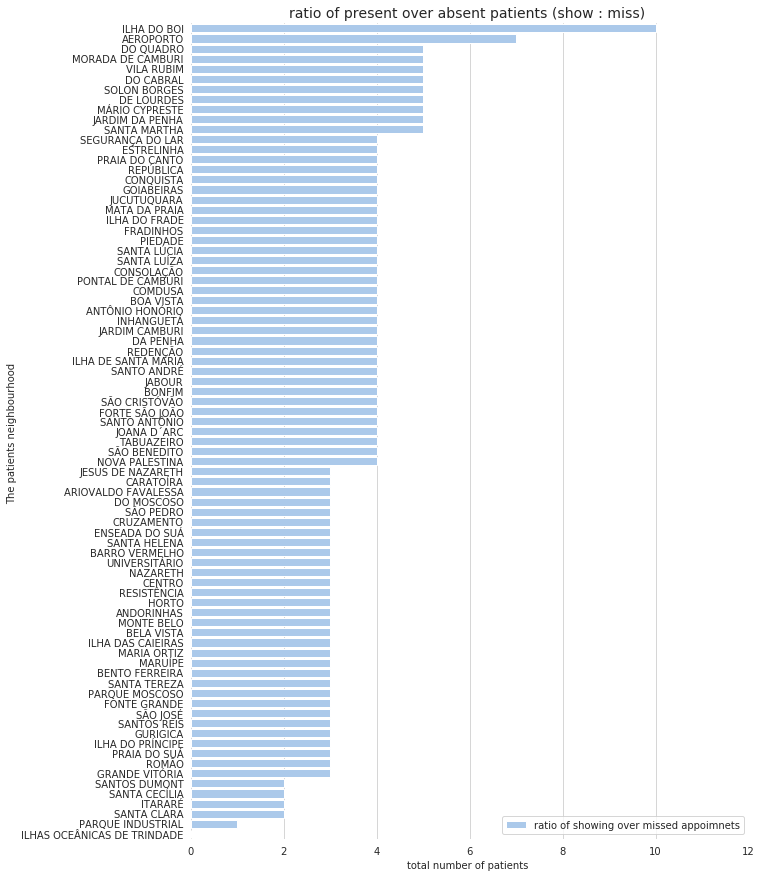

In [55]:
#call a function from "plot_function" to plot an horiztonal bar chrat 

#docstring :
''''plot_horizontal_barchart (dataframe, column, label, ylabel, xlabel, title, xlim=7000)

    plot  horizontal bar chart.


    Parameters
    ----------
    dataframe : pandas dataframe

    column : str
        the investigated column,represent the data in x axis 
        
    label : str
        set a label name for the bar 
        
    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    
    xlim: int
        set limitation for x axis values, it is set as default as 7000    

    Returns
    -------
    
    bar chart plot
    
'''

# call the function:

plot_horizontal_barchart (df_Neighbourhood_sort,'division' ,"ratio of showing over missed appoimnets",
                          "The patients neighbourhood ", "total number of patients ",
                          "ratio of present over absent patients (show : miss) ",12)

>  this grapth tell us that "ILHA DO BOI" have a prediction for 10 patients will attend the appointments over one patient missed it(10:1)(show:miss) , and so on each Neighbourhood with the corresponding number of patients who will show up over each one missed it .



<br>

__As we noticed__ that we have an inspected results from the draph and the data represented in it, thats "ILHA DO BOI" & "AEROPORTO" have the highest ratio of predicted results, but in our previous graphs and data it shows that "JARDIM CAMBURI" & "MARIA ORTIZ" have the record for the highest attended patients but it also record the highest missing appointments and that make it not the first in the ratio predction .That can tell us that not for sure even the Neighbourhood have the highest attending patients that it must be the Neighbourhood which have the highest predction in attending patients 

<br>

<br>






### Which month have the highest  propabilty attending patients ?
<br>


in the next steps we will investigate which month have the highest attending appointments over the missing appointments so we can predect which month we can count one for patients will attend in them

 for now we will creat a dataframe with a copy with mean dataframe and we will creat a new column named "month" which will store the number of months that the patient scheduled the appointment time that we want to attend

In [56]:
# extract the month from 'AppointmentDay'

#creating a copy from the data set
df_month=df.copy()

#make a new column 'month' with the number of the month extracted from 'AppointmentDay'
df_month['month'] = pd.DatetimeIndex(df_month['AppointmentDay']).month

#check the result
df_month.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,show,miss,month
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,4
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,4
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,4
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,4
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,4


next creating a new dataframe have a selected months with the total attending patients number for the each corresponding month

In [57]:
#make a groupby to select from the data set the count of patients shows in appoimnet coresponding with the number of month
df_month_shows=df_month.groupby(['month'])['show'].sum()

#check the result 
df_month_shows

month
4     2602
5    64037
6    21569
Name: show, dtype: int64

repeat the previous action by creating a new dataframe have a selected months __but__ with the total patients who __missed__ their appointments for the each corresponding month

In [58]:
#make a groupby to select from the data set the count of patients shows in appoimnet coresponding with the number of month
df_month_miss=df_month.groupby(['month'])['miss'].sum()

#check the result 
df_month_miss

month
4      633
5    16804
6     4882
Name: miss, dtype: int64

now we will have a view over the data for each corresponding months with the missing and attending total number of patients 

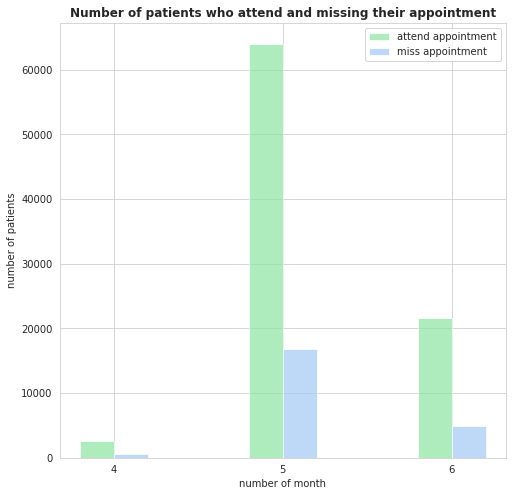

In [59]:
# plot a bar chart using a function :
    
""" plot_2_barchart (dataframe1, dataframe2, label_dataframe1, label_dataframe2, ylabel, xlabel, title)

    plot a bar chart with two dataframe to have a comparison


    Parameters
    ----------
    dataframe1 :pandas dataframe
        the frist investigated data frame

    dataframe2 :pandas dataframe
        the second investigated data frame
        
    label : str
        set a label name for the bar 
        
    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    

    Returns
    -------
    
    bar chart plot
    
"""
    
# call the function 

plot_2_barchart(df_month_shows,df_month_miss,'attend appointment','miss appointment',
                'number of patients','number of month',
                'Number of patients who attend and missing their appointment')

> "May" have the highest total number of patients who have attended their appointments and also have the highest missing appointments

in the next step we will make a ratio for the attending patients over the missing appointments patients to figure out which month have the highest propabilty that the number of patient will attend more than missing appointments

In [60]:
# divide the show data fram over the miss data frame
ratio_month = df_month_shows/df_month_miss

#check dataframe
ratio_month

month
4    4.110585
5    3.810819
6    4.418066
dtype: float64

 plot the proportion between the patients who attended over who missed the appointments

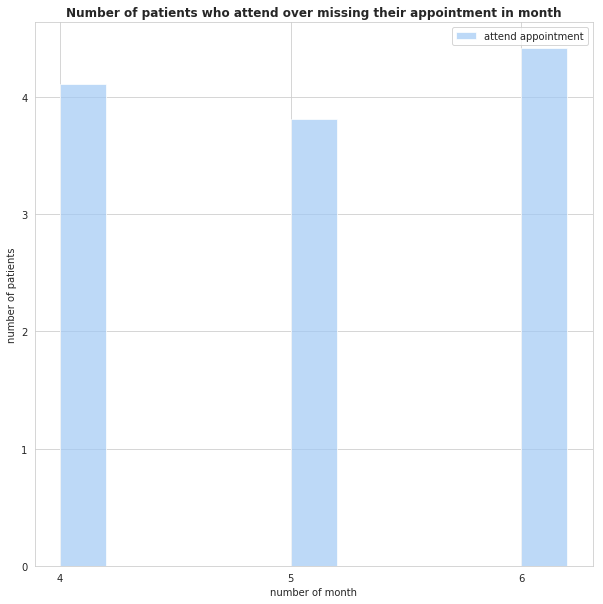

In [61]:
# plot a bar chart using a function :
    
""" plot_1_barchart (dataframe, label, ylabel, xlabel, title)

    plot a bar chart with data of one dataframe

    
    Parameters
    ----------
    dataframe :pandas dataframe
        the data frame we want to plot

    label : str
        set a label name for the bar 

    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    

    Returns
    -------
    
    bar chart plot
    
"""
    
# call the function 
plot_1_barchart (ratio_month, 'attend appointment', 'number of patients',
                 'number of month', 'Number of patients who attend over missing their appointment in month')

> for the previous graph we could figure out that "June" have the hight propotion so we can predict that the patients have a graet propabilty to attend their appointments VS "May" which have the lowest propabilty that the patients may have a greater chance to miss their appointments, and that is a great point becasue even "May" have the greater total number of patients who attended thier appointments but it also have the greater number of patients who missed thier appointments and this made this month the lowest propabilty or the lowest ratio verse the other months.

<br>






### Which day have the highest  propabilty attending patients ?
<br>


 In our next steps, we are investigating that which day have the most probability that patient attend their meeting more than missing it

Our first step in our investigation is to have a copy from our cleaned DataFrame and creat a column that store the name of the week which the patients have schedukat as their Appointment Day

In [62]:
# extract the day name from 'AppointmentDay'

#creating a copy from the data set
df_day=df.copy()

#make a new column 'day' with the name of the day extracted from 'AppointmentDay'
df_day['day'] = pd.to_datetime(df_day['AppointmentDay']).dt.day_name()

#check that the columnn day have been created
df_day.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,show,miss,day
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,Friday


Next step we will have the total number of the patients who have attended their appointments in each day of the week

In [63]:
#make a groupby to select from the data set the count of patients shows in appoimnet over the days of the week 
df_days_shows=df_day.groupby(['day'])['show'].sum()

#show total number in each day
df_days_shows.head()

day
Friday      14982
Monday      18025
Saturday       30
Thursday    13909
Tuesday     20488
Name: show, dtype: int64

 for more figuring out the meaning which day have the highest patients who have attended their meeting we need to plot a bar chart comparison the difference from each day with an other

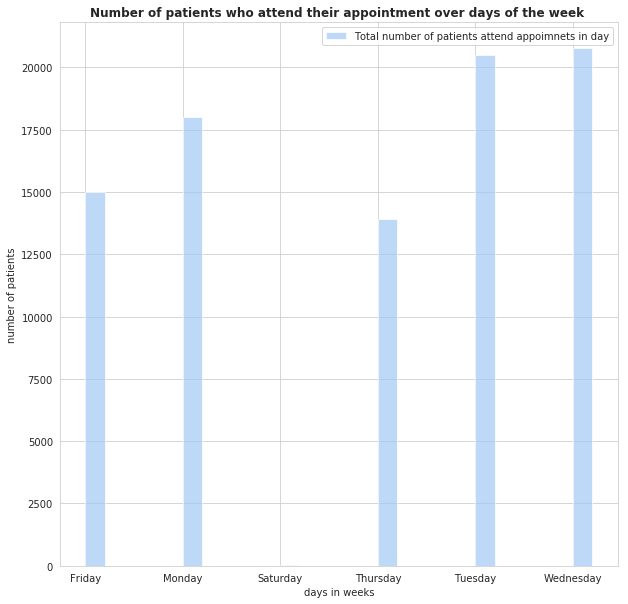

In [64]:
# plot a bar chart using a function :
    
""" plot_1_barchart (dataframe, label, ylabel, xlabel, title)

    plot a bar chart with data of one dataframe

    
    Parameters
    ----------
    dataframe :pandas dataframe
        the data frame we want to plot

    label : str
        set a label name for the bar 

    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    

    Returns
    -------
    
    bar chart plot
    
"""
    
# call the function 
plot_1_barchart (df_days_shows,'Total number of patients attend appoimnets in day',
                 'number of patients', 'days in weeks',
                 'Number of patients who attend their appointment over days of the week ')

> from this graph we can figure out that both "Tuesday" & " Wednesday" have the highest attending patients  with comparing for all the week

 Now we lets have a look for the total number for patients who have missed their appointments, so in the next step we will make the sum of missing appointments in each day

In [65]:
#make a groupby to select from the data set the count of patients shows in appoimnet coresponding with the each day of the week
df_days_miss=df_day.groupby(['day'])['miss'].sum()

#show total number in each day
df_days_miss

day
Friday       4037
Monday       4690
Saturday        9
Thursday     3338
Tuesday      5152
Wednesday    5093
Name: miss, dtype: int64

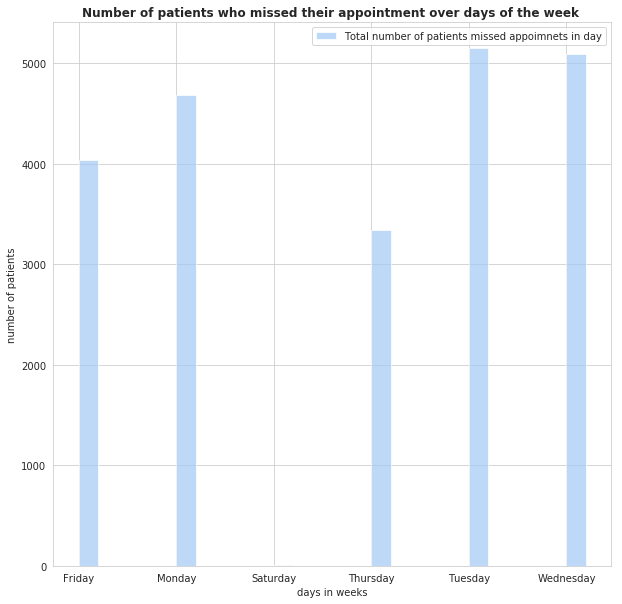

In [66]:
# plot a bar chart using a function :
    
""" plot_1_barchart (dataframe, label, ylabel, xlabel, title)

    plot a bar chart with data of one dataframe

    
    Parameters
    ----------
    dataframe :pandas dataframe
        the data frame we want to plot

    label : str
        set a label name for the bar 

    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    

    Returns
    -------
    
    bar chart plot
    
"""
    
# call the function 
plot_1_barchart (df_days_miss,'Total number of patients missed appoimnets in day',
                 'number of patients', 'days in weeks',
                 'Number of patients who missed their appointment over days of the week ')

> By showing this grapth we can have a look that __all__ the "Tuesday" and "Wednesday" have the highest missed appointments in all the week

 For the next step we want to have a good comparisen for each day of the week with __path__ total number of patients attended and missed their appointment

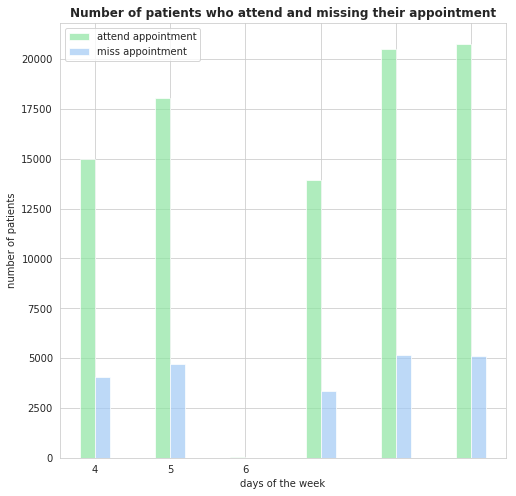

In [67]:
# plot a bar chart using a function :
    
""" plot_2_barchart (dataframe1, dataframe2, label_dataframe1, label_dataframe2, ylabel, xlabel, title)

    plot a bar chart with two dataframe to have a comparison


    Parameters
    ----------
    dataframe1 :pandas dataframe
        the frist investigated data frame

    dataframe2 :pandas dataframe
        the second investigated data frame
        
    label : str
        set a label name for the bar 
        
    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    

    Returns
    -------
    
    bar chart plot
    
"""
    
# call the function 

plot_2_barchart(df_days_shows,df_days_miss,'attend appointment','miss appointment',
                'number of patients','days of the week',
                'Number of patients who attend and missing their appointment')

 like all our investigation we have done so far we want to know the proption of the attended patients over missed one, that mean creating a ratio to know the probability of each day of how much patients shows over one patient missed the appointments.<br>
 
so in our next step we will divide the total number of attended patients in each day over the total patients who missed thier apooimnets in each day to have the ratio how much shows in appointments over each one missed his appointments

In [68]:
ratio_days=df_days_shows/df_days_miss
ratio_days

day
Friday       3.711172
Monday       3.843284
Saturday     3.333333
Thursday     4.166866
Tuesday      3.976708
Wednesday    4.078932
dtype: float64

lets plot or result to easily get the comparison for each day

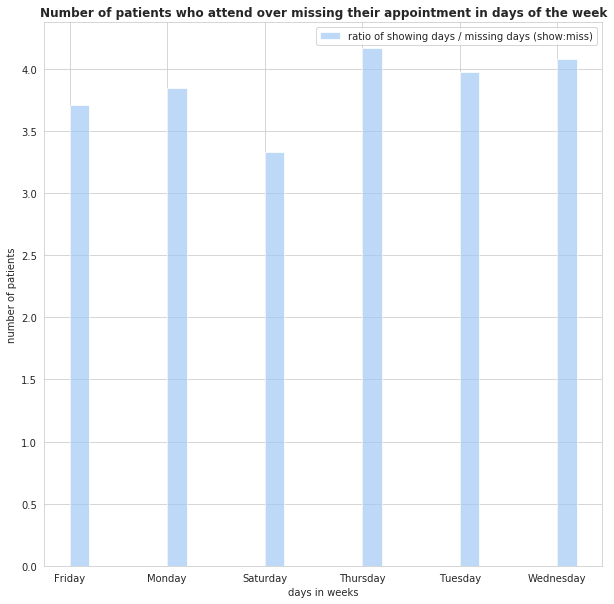

In [69]:
# plot a bar chart using a function :
    
""" plot_1_barchart (dataframe, label, ylabel, xlabel, title)

    plot a bar chart with data of one dataframe

    
    Parameters
    ----------
    dataframe :pandas dataframe
        the data frame we want to plot

    label : str
        set a label name for the bar 

    ylabel : str
        the y axis label
    
    xlabel: str
        the x axis label
    
    title: str
        set title for the plot
    

    Returns
    -------
    
    bar chart plot
    
"""
    
# call the function 
plot_1_barchart (ratio_days,'ratio of showing days / missing days (show:miss)',
                 'number of patients', 'days in weeks',
                 'Number of patients who attend over missing their appointment in days of the week')

> in this figure, "Thursday" tell us that for each one pateint missed the appoimnet , "4" have attened the appoiments and that give it as the highest propabilty of attending patients over the missed one. 
> 
>"Tuesday" & "Wednesday" have the hightest attending total number of patients but that didnt get it as the highest propabilty of attending patients because it have the highest __all__ missed appointments

<br>






### Which Neighbourhood associated with Age have the highest  propabilty attending patients ?
<br>


Our focus in this step is to find out which Neighbourhood associated with Age have the biggest chance for patients to attend their appointments.

<br>

So in the next step we will creat a data frame and we will have the total number of patients who have attended their appointments __and__ the names of Neighbourhood who the patients lived in __and__ their age too.

In [70]:
# creat a variable groupby from the main dataframe the "Neighbourhood" and the "Age" as index
# and their corresponding total number of attened patients from "show" column
df_Neighbour_Age_shows=df.groupby(['Neighbourhood','Age'])['show'].sum()


#creat dataframe for "df_Neighbour_Age_shows"
df_Neighbour_Age_shows=pd.DataFrame(df_Neighbour_Age_shows)

# check the dataframe
df_Neighbour_Age_shows

show
Neighbourhood Age      
AEROPORTO     36      1
              37      0
              51      1
              58      2
              59      1
...                 ...
VILA RUBIM    85      6
              86      9
              88      6
              91      2
              92      3

[6350 rows x 1 columns]

the next step is to drop the zero values from the "show" column

In [71]:
# creat a variable "detect_zero" to collect the zero values from "show" column 
detect_zero = df_Neighbour_Age_shows[ df_Neighbour_Age_shows['show'] == 0 ].index

#drop the zero values from "show" column
df_Neighbour_Age_shows.drop(detect_zero, inplace = True)

#check the result 
df_Neighbour_Age_shows

show
Neighbourhood Age      
AEROPORTO     36      1
              51      1
              58      2
              59      1
              62      1
...                 ...
VILA RUBIM    85      6
              86      9
              88      6
              91      2
              92      3

[6206 rows x 1 columns]

now lets reset our index , meaning that getting the "Neighbourhood" & "Age" from index to columns 

In [72]:
# rest the index for the dataframe "df_Neighbour_Age_shows"
df_Neighbour_Age_shows=df_Neighbour_Age_shows.reset_index()

#check the top 10 rows 
df_Neighbour_Age_shows.head(10)

,Neighbourhood,Age,show
0,AEROPORTO,36,1
1,AEROPORTO,51,1
2,AEROPORTO,58,2
3,AEROPORTO,59,1
4,AEROPORTO,62,1
5,AEROPORTO,64,1
6,ANDORINHAS,1,76
7,ANDORINHAS,2,29
8,ANDORINHAS,3,26
9,ANDORINHAS,4,13


sorting the highest values for "show" column so can we find out which Neighbourhood with thier corresponding Age have the highest attened patients 

In [73]:
# set a new variable "max_values_show" to set a sort for "show"column from high to low attened patient total number 
max_values_show=df_Neighbour_Age_shows.sort_values("show", ascending=False)

# show the 20 first rows :
max_values_show.head(30)

,Neighbourhood,Age,show
3274,MARIA ORTIZ,1,333
4426,RESISTÊNCIA,1,265
2821,JARDIM CAMBURI,1,197
2869,JARDIM CAMBURI,49,177
3013,JESUS DE NAZARETH,1,171
3793,NOVA PALESTINA,1,158
2126,GURIGICA,1,149
2640,ITARARÉ,1,147
4961,SANTA MARTHA,1,145
5882,SÃO PEDRO,1,143


> we can now find out the top 30 Neighbourhood with thier corresponding patients Age , for exapmle Neighbourhood :"MARIA ORTIZ" have recorded "333" total number of attened patients with "1" year old patients.


 Now ploting our investigation to show the relation between the Neighbourhood and the Age of patients and the corresponding attend total number in each of these variables

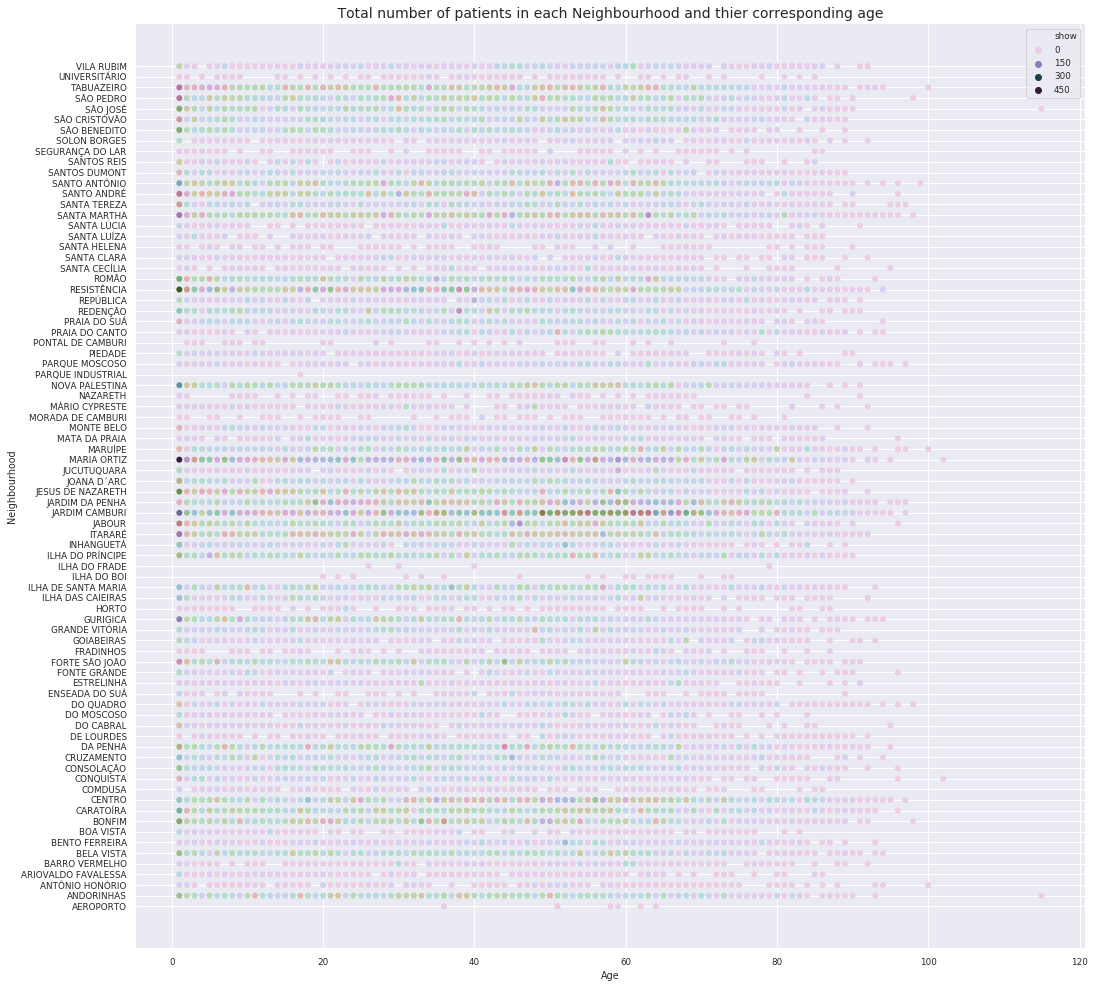

In [74]:
# ploting a scatter shwoing the relations  the Neighbourhood 
# and the Age of patients and the corresponding attend total number

#set the backgroun color
sns.set_style("whitegrid")

# Load the example diamonds dataset
sns.set(font_scale = 0.8)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 17))
sns.despine(f, left=True, bottom=True)
clarity_ranking = [1, 2, 3, 4]
sns.scatterplot(x="Age", y="Neighbourhood",
                hue="show", 
                palette="ch:start=-25,rot=10",
                
                sizes=(12, 12), linewidth=0,
                data=df_Neighbour_Age_shows, ax=ax);
ax.set_title(" Total number of patients in each Neighbourhood and thier corresponding age ",fontsize=14)
sns.despine(left=True, bottom=True)

>I know that the dots are not so clear but our focus here is to highlight the mximum number of attended patients for the neighborhood with corresponding patients Age
>
> Now we can see as example that in "JARDIM CAMBURI" have a __call__ colors between approximate ages 50 to 65

 Now as the same previous steps we want to know the highest number of missed appointments, so we set a groupby to collect the total number of missed appointments from 'Neighbourhood' with their corresponding 'Age'

In [75]:
# creat a variable groupby from the main dataframe the "Neighbourhood" and the "Age" as index
# and their corresponding total number of missed patients from "miss" column
df_Neighbour_Age_miss=df.groupby(['Neighbourhood','Age'])['miss'].sum()

#set a dataframe
df_Neighbour_Age_miss=pd.DataFrame(df_Neighbour_Age_miss)

#show the dataframe 
df_Neighbour_Age_miss

miss
Neighbourhood Age      
AEROPORTO     36      0
              37      1
              51      0
              58      0
              59      0
...                 ...
VILA RUBIM    85      0
              86      0
              88      0
              91      0
              92      0

[6350 rows x 1 columns]

the next step is to drop the zero values from the "miss" column

In [76]:
# creat a variable "detect_zero" to collect the zero values from "miss" column
max_values_miss = df_Neighbour_Age_miss[ df_Neighbour_Age_miss['miss'] == 0 ].index

#drop the zero values from "miss" column
df_Neighbour_Age_miss.drop(max_values_miss, inplace = True)

#check the result 
df_Neighbour_Age_miss

miss
Neighbourhood Age      
AEROPORTO     37      1
ANDORINHAS    1      20
              2       8
              3       6
              4       3
...                 ...
VILA RUBIM    76      2
              77      1
              78      1
              82      1
              84      1

[4674 rows x 1 columns]

and now lets reset our index , meaning that getting the "Neighbourhood" & "Age" from index to columns 

In [77]:
# rest the index for the dataframe "df_Neighbour_Age_miss"
df_Neighbour_Age_miss=df_Neighbour_Age_miss.reset_index()

#check the top 10 rows 
df_Neighbour_Age_miss.head(10)

,Neighbourhood,Age,miss
0,AEROPORTO,37,1
1,ANDORINHAS,1,20
2,ANDORINHAS,2,8
3,ANDORINHAS,3,6
4,ANDORINHAS,4,3
5,ANDORINHAS,5,3
6,ANDORINHAS,6,11
7,ANDORINHAS,7,11
8,ANDORINHAS,8,7
9,ANDORINHAS,9,4


next lets sorting the highest values for "miss" column so can we find out which Neighbourhood with thier corresponding Age have the highest missed patients 

In [78]:
# set a new variable "max_values_show" to set a sort for "miss"column from high to low missed patient total number 
max_values_show=df_Neighbour_Age_miss.sort_values("miss", ascending=False)

# show the 20 first rows :
max_values_show.head(10)

,Neighbourhood,Age,miss
2085,JARDIM CAMBURI,1,59
2475,MARIA ORTIZ,1,52
1519,GURIGICA,1,50
3307,RESISTÊNCIA,1,47
4426,SÃO PEDRO,1,42
2267,JESUS DE NAZARETH,1,40
4352,SÃO JOSÉ,1,38
2128,JARDIM CAMBURI,44,37
1922,ITARARÉ,1,36
4205,SÃO BENEDITO,1,35


 > we can now find out the top 30 Neighbourhood with thier corresponding patients Age , for example Neighbourhood :"JARDIM CAMBURI" have recorded "59" total number of missed appointments patients with "1" year old patients.

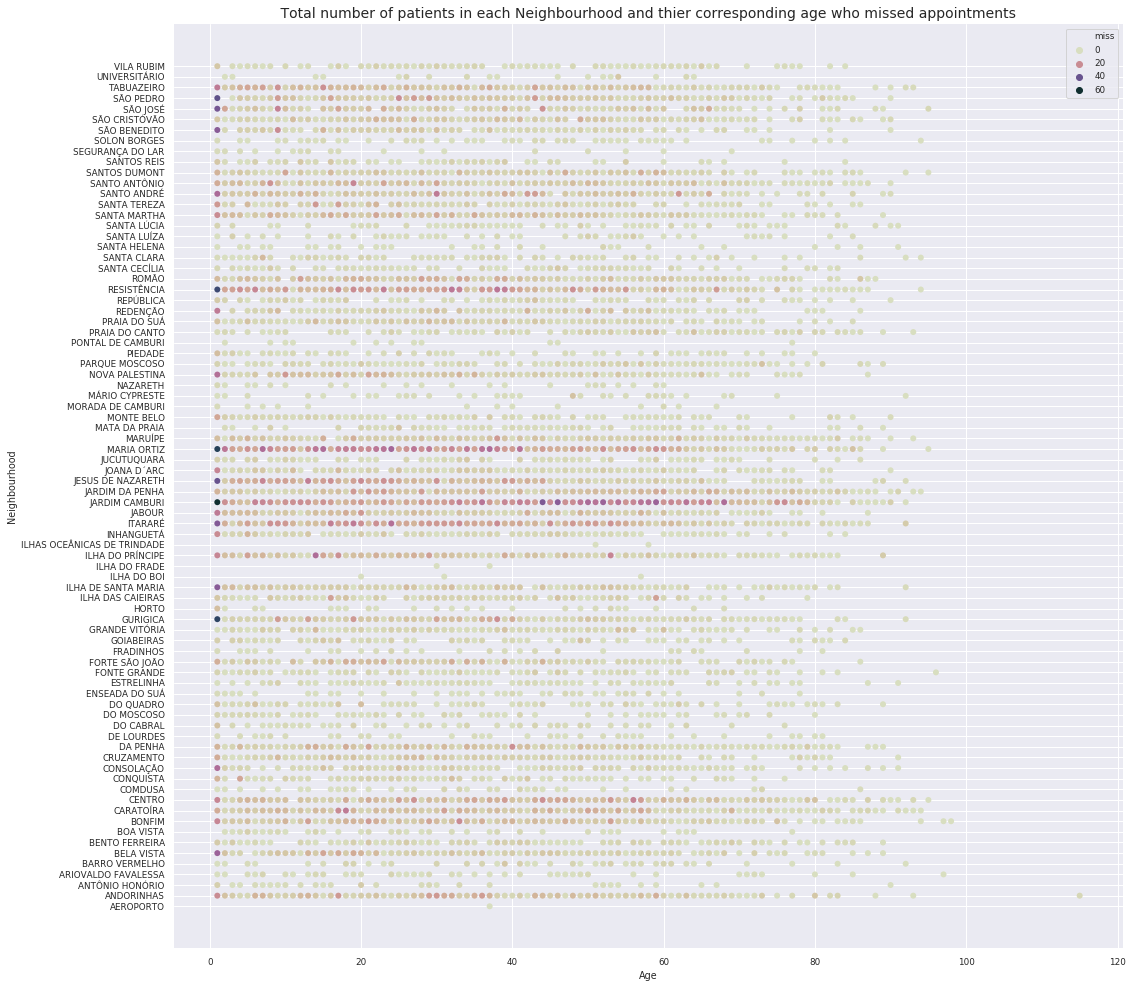

In [79]:
# ploting a scatter shwoing the relations  the Neighbourhood 
# and the Age of patients and the corresponding missed total number appoiments

#set the backgroun color
sns.set_style("whitegrid")

# Load the example diamonds dataset
sns.set(font_scale = 0.8)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 17))
sns.despine(f, left=True, bottom=True)
clarity_ranking = [1, 2, 3, 4]
sns.scatterplot(x="Age", y="Neighbourhood",
                hue="miss", 
                palette="ch:start=80,rot=1",
                
                sizes=(12, 12), linewidth=0,
                data=df_Neighbour_Age_miss, ax=ax);

#set title for the plot
ax.set_title(" Total number of patients in each Neighbourhood and thier corresponding age who missed appointments ",fontsize=14);

> Our graph focus on finding the max number of patients who missed their appointments so the colour only of the maximunm number are highlighted to get focus and donot disturbe from the huge number of "dots"
>
>we can see as example that "JARDIM CAMBURI " have _ bolded _ colors from almost 1 year old to 65 year old approximet , that mean this neighborhood have all ages missed appoimnets

To better predict the Neighbourhood with there corresponding age to see which ones have the high propabilty that patients will attend and have the lowest missed appoimnets 

To do that we have to concat our dataframe and setting a new dataframe with "show" and "missing" columns

In [80]:
# creating a new dataframe and concat the data frames with represent the show and miss  columns 
df_Neighbourhood_age_concat=pd.concat([df_Neighbour_Age_shows, df_Neighbour_Age_miss.miss], axis=1 ,sort=True)

#check the dataframe
df_Neighbourhood_age_concat

,Neighbourhood,Age,show,miss
0,AEROPORTO,36,1,1.0
1,AEROPORTO,51,1,20.0
2,AEROPORTO,58,2,8.0
3,AEROPORTO,59,1,6.0
4,AEROPORTO,62,1,3.0
...,...,...,...,...
6201,VILA RUBIM,85,6,NaN
6202,VILA RUBIM,86,9,NaN
6203,VILA RUBIM,88,6,NaN
6204,VILA RUBIM,91,2,NaN


now for easy reading and following each set we sort the "show" column fro high to low values so we can follow in the steps the highest Neighbourhood corresponding with there age

In [81]:
# sort the DataFrame by the highest total number in show column to the lowest total number 
df_Neighbourhood_age_sort=df_Neighbourhood_age_concat.sort_values("show", ascending=False)

# check the result 
df_Neighbourhood_age_sort

,Neighbourhood,Age,show,miss
3274,MARIA ORTIZ,1,333,1.0
4426,RESISTÊNCIA,1,265,42.0
2821,JARDIM CAMBURI,1,197,1.0
2869,JARDIM CAMBURI,49,177,4.0
3013,JESUS DE NAZARETH,1,171,4.0
...,...,...,...,...
5412,SANTOS DUMONT,83,1,NaN
5413,SANTOS DUMONT,84,1,NaN
5416,SANTOS DUMONT,87,1,NaN
2041,GOIABEIRAS,93,1,5.0


Now we have a problem in our data frame that it contain "NaN" values which came from concating the last two data frame as it missed values for the corresponding Neighbourhood OR Age, so we have to replace it with zero values

In [82]:
# replace the NaN values to "0" as a new value :
df_Neighbourhood_age_sort.replace(to_replace =np.NaN,
                 value =0,
               inplace=True)


# check the 5 raws in dataframe
df_Neighbourhood_age_sort.head()

,Neighbourhood,Age,show,miss
3274,MARIA ORTIZ,1,333,1.0
4426,RESISTÊNCIA,1,265,42.0
2821,JARDIM CAMBURI,1,197,1.0
2869,JARDIM CAMBURI,49,177,4.0
3013,JESUS DE NAZARETH,1,171,4.0


and now to get our propotion we have to divide the "show" column over the "miss" column 

In [83]:
#  creating a new column named as "division" to submit the result of division between 'show' column over "miss" column
df_Neighbourhood_age_sort['division'] = df_Neighbourhood_age_sort['show'].div(df_Neighbourhood_age_sort['miss'].values)

#check dataframe
df_Neighbourhood_age_sort.head()

,Neighbourhood,Age,show,miss,division
3274,MARIA ORTIZ,1,333,1.0,333.000000
4426,RESISTÊNCIA,1,265,42.0,6.309524
2821,JARDIM CAMBURI,1,197,1.0,197.000000
2869,JARDIM CAMBURI,49,177,4.0,44.250000
3013,JESUS DE NAZARETH,1,171,4.0,42.750000


> we creat a new column in our dataframe named "division" hold show/miss columns.<br>
> we notice that we have __two problems :__ <br>
- one is that we have an "inf" (infinty) number get from diviing 1 over zero <br>
- second is our result in division column are in float type

so in the next step we will deal with the __infinty__ numbers by replacing them to NaN (not a number) type so we can easly replace it in the next steps

In [84]:
#replace the inf and -inf numbers with "NaN" by using numpy methods
df_Neighbourhood_age_sort.replace([np.inf, -np.inf], np.nan, inplace=True)

#check our data frame
df_Neighbourhood_age_sort.head()

,Neighbourhood,Age,show,miss,division
3274,MARIA ORTIZ,1,333,1.0,333.000000
4426,RESISTÊNCIA,1,265,42.0,6.309524
2821,JARDIM CAMBURI,1,197,1.0,197.000000
2869,JARDIM CAMBURI,49,177,4.0,44.250000
3013,JESUS DE NAZARETH,1,171,4.0,42.750000


now after replacing the infinty to NaN we can make an other replacement from "NaN" to value '1' 

In [85]:
# replace the NaN values to "1" as a new value :
df_Neighbourhood_age_sort.division.replace(to_replace =np.NaN,
                 value =1,
               inplace=True)

# check the 5 raws in dataframe
df_Neighbourhood_age_sort.head()

,Neighbourhood,Age,show,miss,division
3274,MARIA ORTIZ,1,333,1.0,333.000000
4426,RESISTÊNCIA,1,265,42.0,6.309524
2821,JARDIM CAMBURI,1,197,1.0,197.000000
2869,JARDIM CAMBURI,49,177,4.0,44.250000
3013,JESUS DE NAZARETH,1,171,4.0,42.750000


Next step we will change the type of our 'division' column from float to integer as we want the numbers reprecent the number of patients who will show over each one miss the appointment

In [86]:
#set a new type for column "division" as integer
df_Neighbourhood_age_sort['division'] = df_Neighbourhood_age_sort['division'].astype(int)

# check info for dataframe
print (df_Neighbourhood_age_sort.info())

# check dataframe
df_Neighbourhood_age_sort.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6206 entries, 3274 to 0
Data columns (total 5 columns):
Neighbourhood    6206 non-null object
Age              6206 non-null int64
show             6206 non-null int64
miss             6206 non-null float64
division         6206 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 290.9+ KB
None


,Neighbourhood,Age,show,miss,division
3274,MARIA ORTIZ,1,333,1.0,333
4426,RESISTÊNCIA,1,265,42.0,6
2821,JARDIM CAMBURI,1,197,1.0,197
2869,JARDIM CAMBURI,49,177,4.0,44
3013,JESUS DE NAZARETH,1,171,4.0,42


> the divison column dtype is 'int64'

Next step we will sort our dataframe value in the divison column to shows the high values 

In [87]:
# sort the DataFrame by the highest total number in show column to the lowest total number 
df_Neighbourhood_age_sort=df_Neighbourhood_age_sort.sort_values("division", ascending=False)

# check the result 
df_Neighbourhood_age_sort.head()

,Neighbourhood,Age,show,miss,division
3274,MARIA ORTIZ,1,333,1.0,333
2821,JARDIM CAMBURI,1,197,1.0,197
2640,ITARARÉ,1,147,1.0,147
2882,JARDIM CAMBURI,62,135,1.0,135
2880,JARDIM CAMBURI,60,128,1.0,128


Now we go for plotting or proportional data in the "divison" column to show __what the number of predicted patients will attend their appointments in each Neighbourhood coresponding with their age__ .

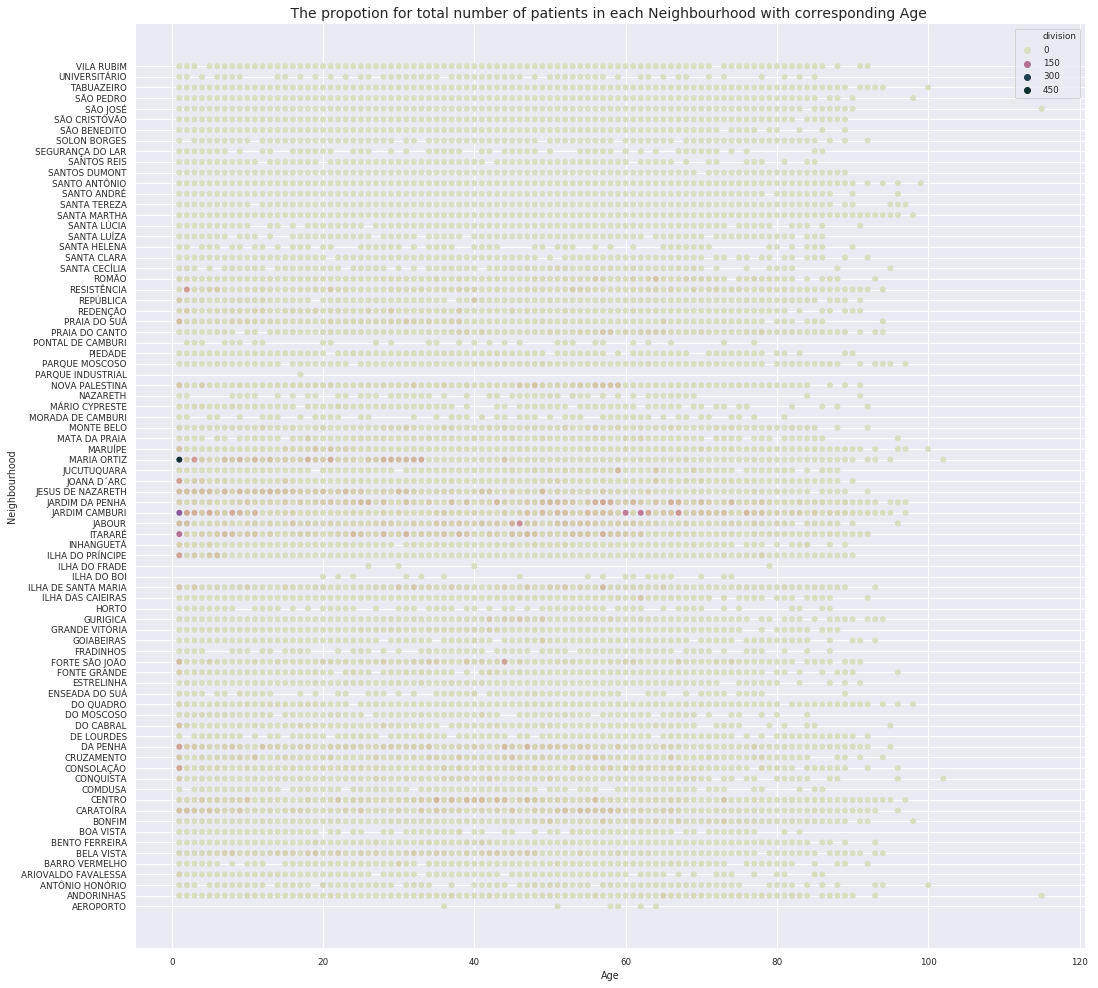

In [88]:
# ploting a scatter shwoing the relations  the Neighbourhood 
# and the Age of patients and the corresponding attend total number

#set the backgroun color
sns.set_style("whitegrid")

# Load the example diamonds dataset
sns.set(font_scale = 0.8)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 17))
sns.despine(f, left=True, bottom=True)
clarity_ranking = [1, 2, 3, 4]
sns.scatterplot(x="Age", y="Neighbourhood",
                hue="division", 
                palette="ch:start=80,rot=1",
                
                sizes=(12, 12), linewidth=0,
                data=df_Neighbourhood_age_sort, ax=ax);
ax.set_title(" The propotion for total number of patients in each Neighbourhood with corresponding Age  ",fontsize=14)
sns.despine(left=True, bottom=True)

to get our data more readable and to more have a good look for the hightest propabilty for Neighbourhood with ages 
correspond to it we only take the first high "200" values from our dataframe   

In [89]:
#set new dataframe collect only the first 200 rows 
hight_1000_values=df_Neighbourhood_age_sort.head(200)

#check dataframe
hight_1000_values.head(10)

,Neighbourhood,Age,show,miss,division
3274,MARIA ORTIZ,1,333,1.0,333
2821,JARDIM CAMBURI,1,197,1.0,197
2640,ITARARÉ,1,147,1.0,147
2882,JARDIM CAMBURI,62,135,1.0,135
2880,JARDIM CAMBURI,60,128,1.0,128
2777,JABOUR,46,102,1.0,102
2887,JARDIM CAMBURI,67,95,1.0,95
4427,RESISTÊNCIA,2,88,1.0,88
3276,MARIA ORTIZ,3,86,1.0,86
3102,JOANA D´ARC,1,82,1.0,82


>  now we can predict that "MARIA ORTIZ" have the highest prediction for the "1" years old patients that they will attend the appointments


and now let us plot it as scatter plot

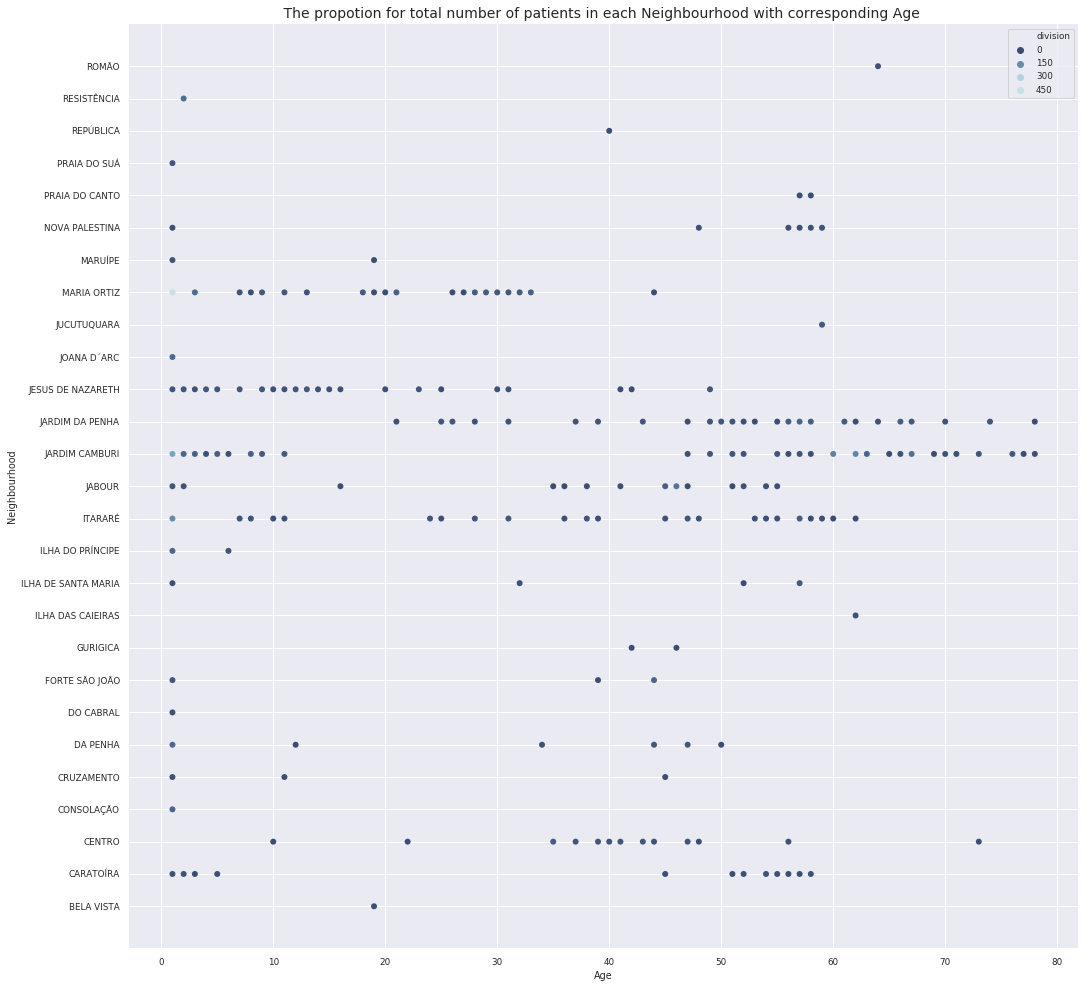

In [90]:
# ploting a scatter shwoing the relations  the Neighbourhood 
# and the Age of patients and the corresponding attend total number

#set the backgroun color
sns.set_style("whitegrid")

# Load the example diamonds dataset
sns.set(font_scale = 0.8)

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(17, 17))
sns.despine(f, left=True, bottom=True)
clarity_ranking = [1, 2, 3, 4]
sns.scatterplot(x="Age", y="Neighbourhood",
                hue="division", 
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(12, 12), linewidth=0,
                data=hight_1000_values, ax=ax);
ax.set_title(" The propotion for total number of patients in each Neighbourhood with corresponding Age  ",fontsize=14)
sns.despine(left=True, bottom=True)

> As our figure tell us that the Neighbourhoods with "1" years old patients have the highest ever prediction for the patients will attend the appointments .

<a id='conclusions'></a>
## Conclusions

For summarizing our investigation, we can answer our main question "What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? " with the results we get so far:

- the ages from 45 to 55 years old and the ages below 10 years old have the hight chance to attend their appoimnets more than the the other ages 
- the gender dont matter in this data set beacuse they have the same propabilty in attending and missing appoimnets 
- the Neighbourhoods "ILHA DO BOI" have hight chance that pateints will show up more than missing the appointments
- "June" have the hight prediction that the patients will commit to their scheduled appointment
- "Thursday" is the day which we will have a commitment from patients to more show up than missing appointments
- "MARIA ORTIZ"  Neighbourhoods have the highest prediction for the "1" years old patients that they will attend the appointments

so now we have many factors can hepl us to find out the better prediction for show up patients 


### Limitations

I have to admit my personal Limitation for this study, that leak of my knowledge and how to more implementing the statistics methods to better get out the ultimate probabilities, that can for sure help alot to get better resuts and more accurat one.

Also the data set is only for 2016 which can varry alot from our present year (2022) beacuse the tecnology gap and for sure the the health knowledge for the peoples in barzil which it get better and better each year and that incourage them to get to more attending for asking help from doctors and min the missing appointments (maybe we must check too for the last part that i tip it ,as i say the data is the only judge)


In [93]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0